# SD Simulations with Submission System


## Imports

In [1]:
import os
#for analysis
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

from pygromos.files.gromos_system import Gromos_System
from pygromos.files.blocks import imd_blocks
from pygromos.data.simulation_parameters_templates import template_emin

## Input files

In [2]:
root_dir = project_dir = os.path.abspath("../example_files/SD_Simulation/")
root_in_dir = root_dir+"/SD_input"
cnf_path = root_in_dir+"/6J29_unitedatom_optimised_geometry.cnf"
top_path = root_in_dir + "/6J29.top"
sys_name = "6J29"

#External imd_changes:
grom_system = Gromos_System(in_cnf_path=cnf_path, in_top_path=top_path, in_imd_path=template_emin,
                            system_name=sys_name, work_folder=root_in_dir)

grom_system.cnf.add_empty_box()


## RUN Emin

In [3]:
from pygromos.simulations.hpc_queuing.submission_systems.local import LOCAL as subSystem
from pygromos.simulations.modules.preset_simulation_modules import emin
step_name  = "a_vacuum_emin"

#Some special adaptation
grom_system.imd.BOUNDCOND.NTB =0
grom_system.imd.BOUNDCOND.NDFMIN = 0
grom_system.imd.WRITETRAJ = imd_blocks.WRITETRAJ()
grom_system.imd.WRITETRAJ.NTWX = 100
grom_system.imd.WRITETRAJ.NTWE = 100
grom_system.prepare_for_simulation()

In [4]:

grom_system.save(root_dir+"/test.obj", safe=False)

'/home/mlehner/PyGromosTools/docs/sphinx_project/Examples/example_files/SD_Simulation/test.obj'

In [5]:
grom_system = Gromos_System.load(root_dir+"/test.obj")

In [6]:
grom_system.solute_info._asdict()

{'names': ['6J29'], 'number': 1, 'positions': [1], 'number_of_atoms': 27}

In [7]:
grom_system.cnf.view

NGLWidget()

In [8]:
from pygromos.simulations.modules.preset_simulation_modules import emin


emin_gromos_system = emin(in_gromos_system=grom_system, 
                                 step_name=step_name, 
                                 submission_system=subSystem(), 
                                 in_imd_path=None)
jobID = emin_gromos_system._last_jobID
emin_gromos_system


################################################################################

a_vacuum_emin
################################################################################

FOUND RESULT: /home/mlehner/PyGromosTools/docs/sphinx_project/Examples/example_files/SD_Simulation/SD_input/a_vacuum_emin/analysis/data/a_vacuum_emin.cnf
 GOING TO SKIPT THIS SUBMISSION!



GROMOS SYSTEM: a_vacuum_emin
################################################################################
WORKDIR: /home/mlehner/PyGromosTools/docs/sphinx_project/Examples/example_files/SD_Simulation/SD_input
LAST CHECKPOINT: /home/mlehner/PyGromosTools/docs/sphinx_project/Examples/example_files/SD_Simulation/test.obj

GromosXX_bin: None
GromosPP_bin: None
FILES: 
	imd: /home/mlehner/PyGromosTools/docs/sphinx_project/Examples/example_files/SD_Simulation/SD_input/a_vacuum_emin/input/a_vacuum_emin.imd
	top: /home/mlehner/PyGromosTools/docs/sphinx_project/Examples/example_files/SD_Simulation/SD_input/a_vacuum_emin/input/a_vacuum_emin.top
	cnf: /home/mlehner/PyGromosTools/docs/sphinx_project/Examples/example_files/SD_Simulation/SD_input/a_vacuum_emin/analysis/data/a_vacuum_emin.cnf
FUTURE PROMISE: False
SYSTEM: 
	Solute:	['6J29']  resID: [1]  natoms: 27
	SOLVENT:	[]  nmolecules: 0  natoms: 0



In [9]:
emin_gromos_system.cnf.view

NGLWidget()

In [10]:
emin_gromos_system


GROMOS SYSTEM: a_vacuum_emin
################################################################################
WORKDIR: /home/mlehner/PyGromosTools/docs/sphinx_project/Examples/example_files/SD_Simulation/SD_input
LAST CHECKPOINT: /home/mlehner/PyGromosTools/docs/sphinx_project/Examples/example_files/SD_Simulation/test.obj

GromosXX_bin: None
GromosPP_bin: None
FILES: 
	imd: /home/mlehner/PyGromosTools/docs/sphinx_project/Examples/example_files/SD_Simulation/SD_input/a_vacuum_emin/input/a_vacuum_emin.imd
	top: /home/mlehner/PyGromosTools/docs/sphinx_project/Examples/example_files/SD_Simulation/SD_input/a_vacuum_emin/input/a_vacuum_emin.top
	cnf: /home/mlehner/PyGromosTools/docs/sphinx_project/Examples/example_files/SD_Simulation/SD_input/a_vacuum_emin/analysis/data/a_vacuum_emin.cnf
FUTURE PROMISE: False
SYSTEM: 
	Solute:	['6J29']  resID: [1]  natoms: 27
	SOLVENT:	[]  nmolecules: 0  natoms: 0



In [11]:
emin_gromos_system.work_folder+"/analysis/data"

'/home/mlehner/PyGromosTools/docs/sphinx_project/Examples/example_files/SD_Simulation/SD_input/analysis/data'

## RUN SD Simulation

In [12]:
from pygromos.simulations.modules.preset_simulation_modules import sd

step_name  = "b_vacuum_sd"

sd_gromos_system  = sd(in_gromos_system=emin_gromos_system,
                              step_name=step_name, 
                       submission_system=subSystem(nmpi=1),
                      equilibration_runs=1, simulation_runs=3)
jobID = sd_gromos_system._last_jobID

sd_gromos_system

sd_gromos_system.cnf.view

################################################################################

b_vacuum_sd
################################################################################

FOUND RESULT: /home/mlehner/PyGromosTools/docs/sphinx_project/Examples/example_files/SD_Simulation/SD_input/b_vacuum_sd/analysis/data/b_vacuum_sd.cnf
 GOING TO SKIPT THIS SUBMISSION!


NGLWidget()

## Further Analysis:
Transform the trc into a pdb traj to check it out with pymol :!)

In [13]:
#final analysis dir:
from pygromos.utils import bash

out_ana = project_dir+"/c_ana"
if(not os.path.exists(out_ana)):
    bash.make_folder(out_ana)

### Coordinate Analysis

In [14]:
from pygromos.files.trajectory.trc import Trc

trc = sd_gromos_system.trc
trc.write_pdb(out_ana+"/sd_traj.pdb", cnf_file=cnf_path)#grom_system.cnf.path)
trc

NoSuchNodeError: group ``/`` does not have a child named ``coordinates``

In [15]:
traj = trc.view
traj

NameError: name 'trc' is not defined

### Energy Analysis

In [16]:
from pygromos.files.trajectory.tre import Tre

tre = sd_gromos_system.tre
tre


Trajectory: 
	Read from hdf save 
	Contains only database
	
Type: 
	Tre
Frames: 	63	 Columns:	13


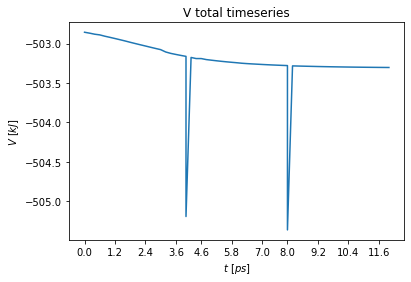

In [17]:
#Plot Potential Energies
V_tot = np.array(list(map(lambda x: x[2], tre.database.totals)))
step = len(tre.database.TIMESTEP_time)//10

plt.plot(tre.database.TIMESTEP_time, V_tot)
plt.xticks(np.round(list(tre.database.TIMESTEP_time[::step]),2))
plt.xlabel("$t~[ps]$")
plt.ylabel("$V~[kJ]$")
plt.title("V total timeseries")
plt.savefig(out_ana+"/potential_energy_timeseries.png")